<a href="https://colab.research.google.com/github/emilienaples/people_news_trust/blob/main/people_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##How many people trust the news? (num_reliable)

##How many people agree with the news? (agree)


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Makes graph display in notebook
%matplotlib inline   

#ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn()

In [2]:
news = pd.read_excel('PeopleNews.xlsx')
news.head()

,Age,Country,Occupation,Annual Income,Trusted Source,num_reliable,agree
0,20,USA,Student,10000,CNN,2,1
1,20,USA,Student,15000,NY Times,3,3
2,21,USA,Student,10000,NY Times,2,3
3,25,USA,Accounting,60000,None,0,0
4,35,USA,Admin Assistant,55000,Fox,2,1


In [3]:
news.shape

(87, 7)

In [4]:
news.describe().round(3)

,Age,Annual Income,num_reliable,agree
count,87.000,87.000,87.000,87.000
mean,31.241,44965.517,1.851,1.793
std,15.732,31099.782,1.244,1.183
min,20.000,4000.000,0.000,0.000
25%,21.000,10000.000,1.000,1.000
50%,25.000,50000.000,2.000,2.000
75%,33.000,60000.000,3.000,3.000
max,79.000,129000.000,4.000,4.000


In [5]:
news.dtypes

Age                int64
Country           object
Occupation        object
Annual Income      int64
Trusted Source    object
num_reliable       int64
agree              int64
dtype: object

In [6]:
# age = continous both nominal & ordinal
# country = discrete nominal
# Occupation = discrete
# Trusted Source = discrete
# Annual Income = continous
# num_reliable = discrete
# agree = discrete

In [7]:
cat_cols = ['Country', 'Occupation', 'Trusted Source',  'num_reliable', 'agree']
num_cols = ['Age', 'Annual Income']

Discrete variables should be shown in barplots rather than histograms, scatterplots are only reasonable betwen pair of continuous variables rather than discrete, boxplots should be used to compare a conntinuous variable vs discretre or categorical.



If you can count the items, then you are working with a discrete variable – e.g. counting the number of people in a stadium. But if you can measure the items, you are working with a continuous variable – e.g. measuring height, weight, time, etc.

## Data Visualization

BAR PLOT FOR CATEGORICAL COLUMNS

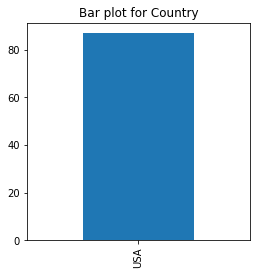

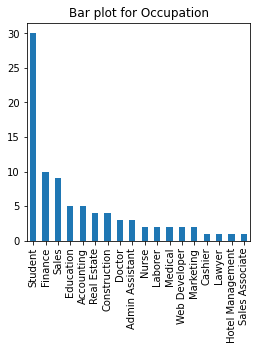

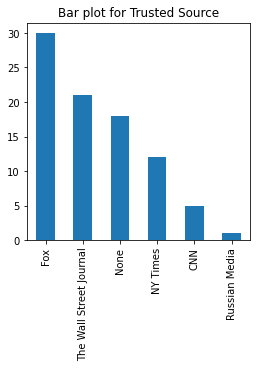

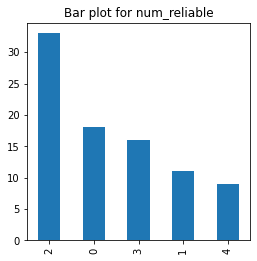

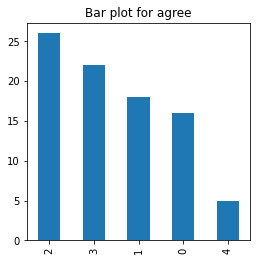

In [8]:
for col in cat_cols:
    fig = plt.figure(figsize=(4,4)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = news[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)

#Scatter Plot for Numerical Features

(Annual Income and Age)

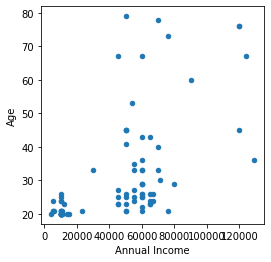

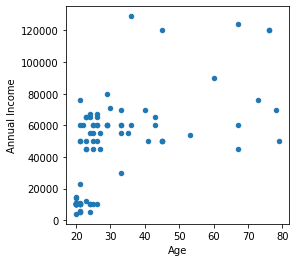

In [9]:
fig = plt.figure(figsize=(4,4)) # define plot area
ax = fig.gca() # define axis  
news.plot.scatter(x = 'Annual Income', y = 'Age', ax = ax)

fig = plt.figure(figsize=(4,4)) # define plot area
ax = fig.gca() # define axis  
news.plot.scatter(x = 'Age', y = 'Annual Income', ax = ax)

**obtain the histogram whose area = 1  
hist(Grade, freq = F) in R**

**what is the ecdf??**

## BOX PLOTS OF CATEGORICAL COLUMNS AGAINST CONTINOUS VARIABLE AGE:

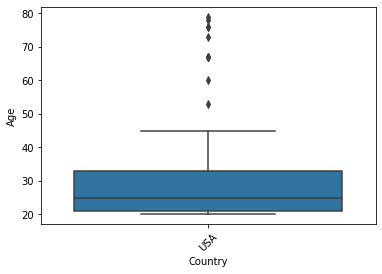

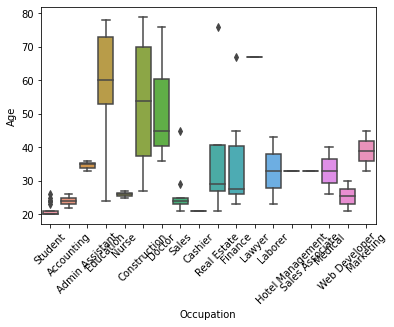

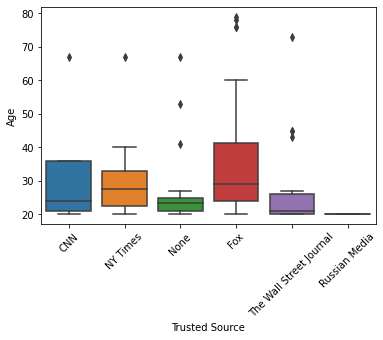

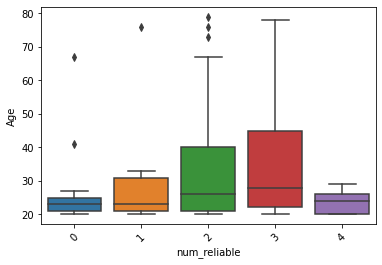

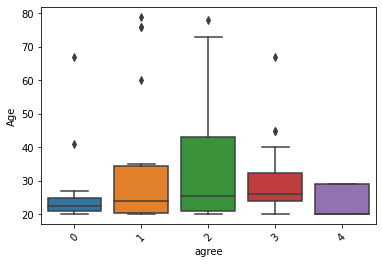

In [10]:
for col in cat_cols:
  sns.boxplot(x=news[col], y='Age', data=news)
  plt.xlabel(col) # Set text for the x axis
  plt.xticks(rotation=45)
  plt.ylabel('Age')# Set text for y axis
  plt.show()

## BOX PLOTS OF CATEGORICAL COLUMNS AGAINST CONTINOUS VARIABLE ANNUAL INCOME:

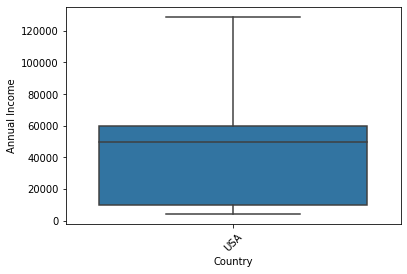

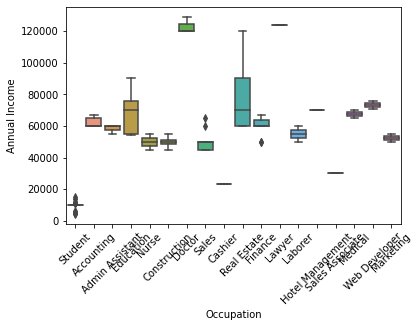

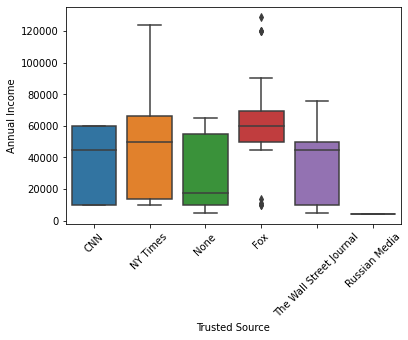

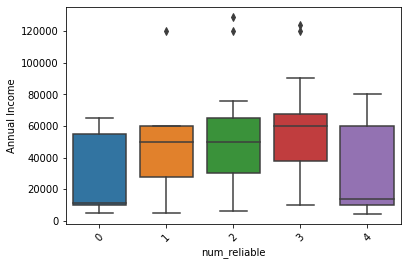

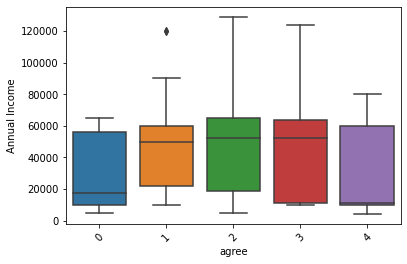

In [11]:
for col in cat_cols:
  sns.boxplot(x=news[col], y='Annual Income', data=news)
  plt.xlabel(col) # Set text for the x axis
  plt.xticks(rotation=45)
  plt.ylabel('Annual Income')# Set text for y axis
  plt.show()

## Transforming Skewed Features

In our analysis we can see that it might be useful to tranform Age and Income, as they are very right skewed. There are also two populations for 'Occupation' which are 'Student' and 'Other'

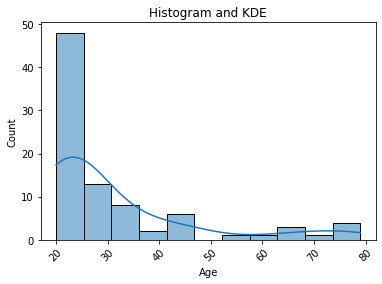

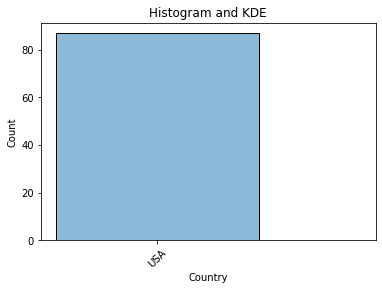

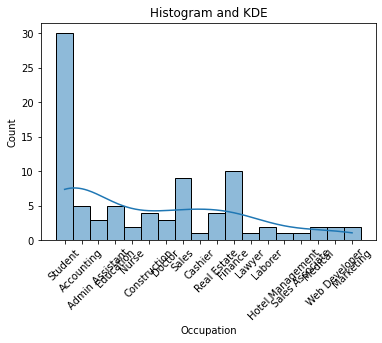

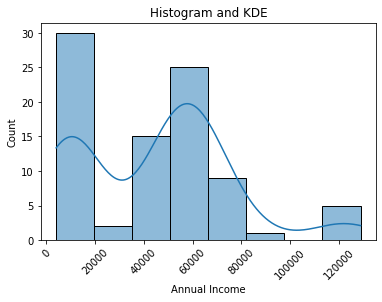

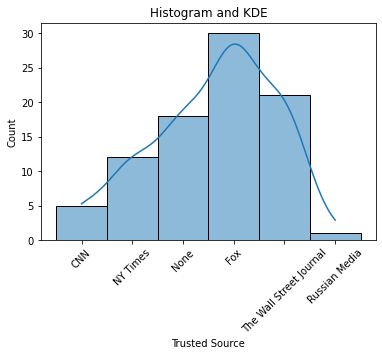

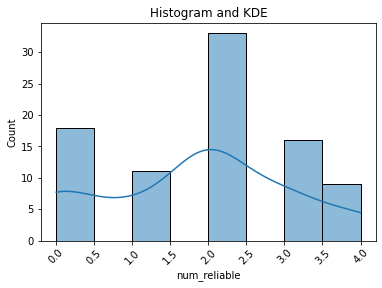

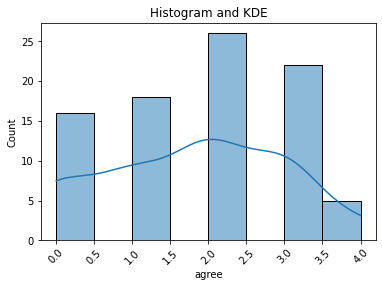

In [13]:
for col in news:
  fig, ax = plt.subplots()
  sns.histplot(data=news, x=col, kde=True)
  ax.set_title("Histogram and KDE")
  plt.xticks(rotation=45)

We see that Age is very right skewed. There are also two populations for Occupation, 'Student' and 'Other'.


Annual Income has gaps in the distribution. There are several populations.  

## Skew

In [14]:
num_feats = news.dtypes[news.dtypes != 'object'].index
skew_feats=news[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew': skew_feats})

skewness

,Skew
Age,1.847848
Annual Income,0.545060
num_reliable,-0.043681
agree,-0.061708


# Divide subpopulations for Age

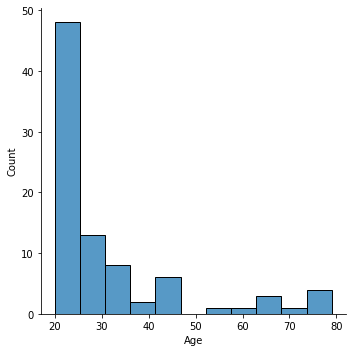

In [15]:
sns.displot(news.Age)

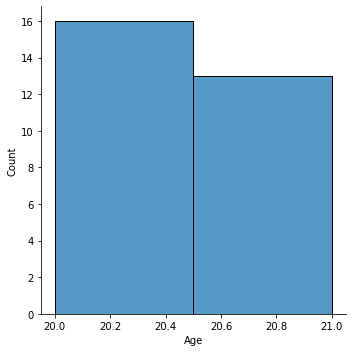

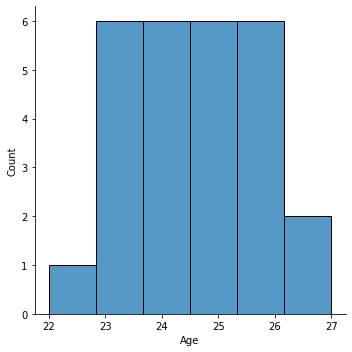

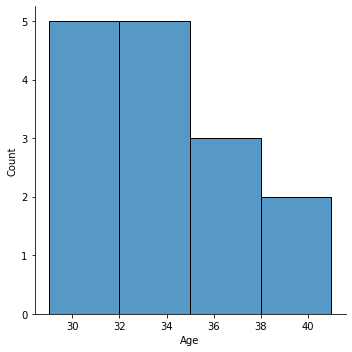

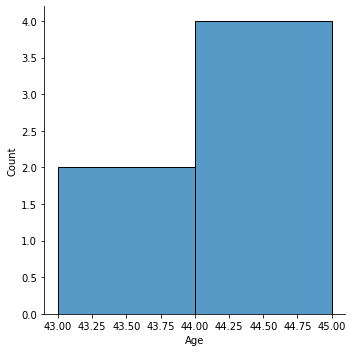

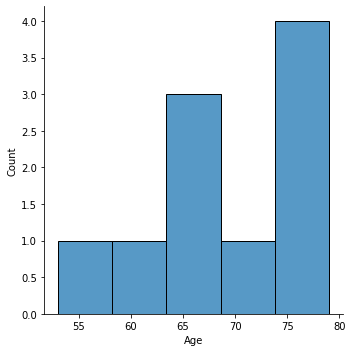

In [16]:
under_22 = news.loc[news['Age'] <= 21]
under_28 = news.loc[news['Age'].between(22, 28, 'both')]
under_41 = news.loc[news['Age'].between(29, 41, 'both')]
under_46 = news.loc[news['Age'].between(42, 46, 'both')]
over_46 = news.loc[news['Age'] >= 46]

sns.displot(under_22['Age'], bins=2)
sns.displot(under_28['Age'])
sns.displot(under_41['Age'], bins=4)
sns.displot(under_46['Age'], bins=2)
sns.displot(over_46['Age'])

Dividing into subpopulations fixed the distributions, and it doesn't appear that any other transformation further improves the distribution in any subpopulation for the continous variable Age

## Divide Subpopulations for Annual Income



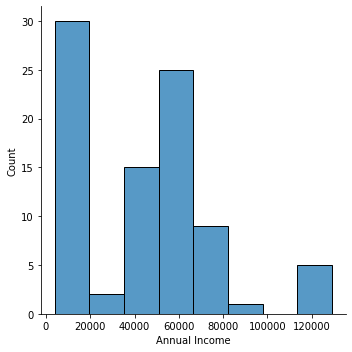

In [17]:
sns.displot(news['Annual Income'])

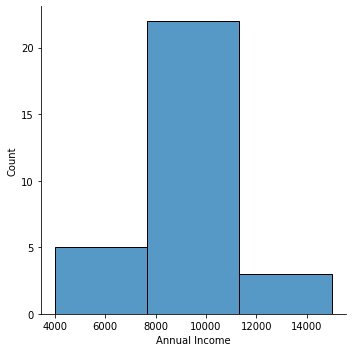

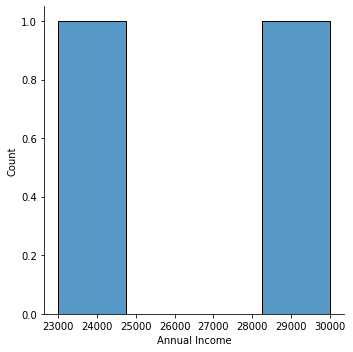

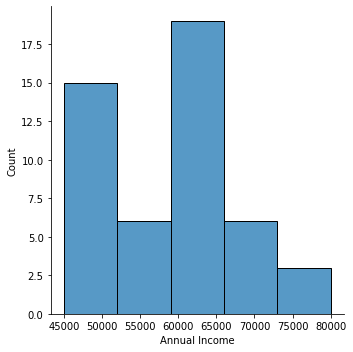

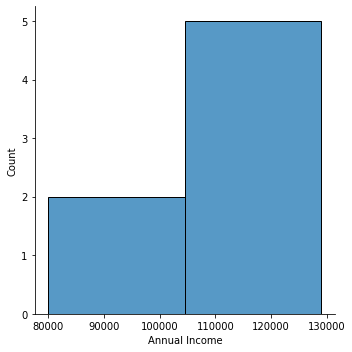

In [18]:
under_20 = news.loc[news['Annual Income'] <= 20000]
between_20_40 = news.loc[news['Annual Income'].between(20000, 40000, 'both')]
between_40_80 = news.loc[news['Annual Income'].between(40000, 80000, 'both')]
over_80 = news.loc[news['Annual Income'] >= 80000]

sns.displot(under_20['Annual Income'], bins=3)
sns.displot(between_20_40['Annual Income'], bins=4)
sns.displot(between_40_80['Annual Income'], bins=5)
sns.displot(over_80['Annual Income'], bins=2)

## Transform the Continous Variables "Age" and "Annual Income"
I don't think this is necessary now.

## Model Fitting

Fit a univariate distribution model for each continuous (possibly transformed) variable.  Select the best model using the AIC criteria

In [19]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=b36b1add66d47cfa8a3e2e2cc7e67a6823fad3d18fbd01763e07b3947703915f
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


## We have to fit the distribution for each of the subpopulations within Age

## Subpopulation under 22

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  7.00it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,1.750436,11.258157,-71.313602,inf,0.551696,8.020583e-09
burr,1.924596,10.438980,-65.195624,inf,0.369817,4.573235e-04
norm,2.144106,6.253427,-68.798034,inf,0.368033,4.965000e-04
lognorm,4.028877,23.200472,-47.138546,inf,0.515287,1.117429e-07
beta,inf,inf,inf,inf,NaN,NaN


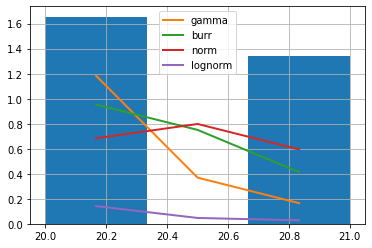

In [20]:
from fitter import Fitter, get_common_distributions, get_distributions
pop_under_22 = under_22['Age'].values
f_22 = Fitter(pop_under_22,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=3)
f_22.fit()
f_22.summary()

In [21]:
f_22.get_best(method = 'sumsquare_error')

{'gamma': {'a': 0.384311007357666,
  'loc': 19.99999999999927,
  'scale': 0.6821532744094538}}

## Gamma distribution is the best fit based on the sumsquare_error criteria.    

It also prints the optimized parameters for the gamma distribution: shape, location and scale parameters for gamma distribution.

## Subpopulation under 28

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  5.45it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.002607,14.377873,-243.029308,0.011263,0.152260,0.510221
gamma,0.002658,16.378061,-239.210363,0.011417,0.150554,0.524471
lognorm,0.002722,16.378809,-238.570889,0.011630,0.149122,0.536560
burr,0.005205,18.668313,-217.773401,0.023774,0.166397,0.399473
beta,0.013872,18.722965,-191.306941,0.046201,0.209463,0.161844


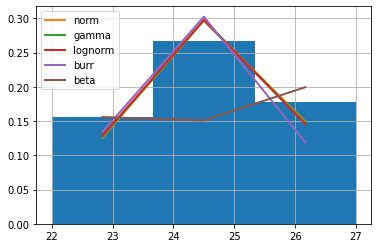

In [22]:
from fitter import Fitter, get_common_distributions, get_distributions
pop_under_28 = under_28['Age'].values
f_28 = Fitter(pop_under_28,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=3)
f_28.fit()
f_28.summary()

In [23]:
f_28.get_best(method = 'sumsquare_error')

{'norm': {'loc': 24.59259259259259, 'scale': 1.3405156348780634}}

## Subpopulation under 41

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.19it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.001404,20.359609,-133.732289,0.017290,0.195284,0.551910
burr,0.006213,24.892627,-106.005063,0.130549,0.229564,0.352874
beta,0.014496,32.125897,-93.297018,0.424010,0.571024,0.000037
gamma,0.015611,31.490257,-94.893186,0.521407,0.592441,0.000015
lognorm,0.018016,31.866025,-92.743618,0.263219,0.320643,0.071613


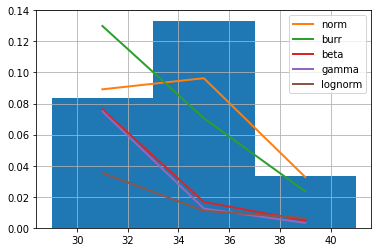

In [24]:
from fitter import Fitter, get_common_distributions, get_distributions
pop_under_41 = under_41['Age'].values
f_41 = Fitter(pop_under_41,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=3)
f_41.fit()
f_41.summary()

In [25]:
f_41.get_best(method = 'sumsquare_error')

{'norm': {'loc': 33.266666666666666, 'scale': 3.714236873915765}}

## Subpopulation Under 46

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  7.07it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.588040,10.535282,-10.352800,inf,0.426917,0.165539
gamma,0.603808,12.519076,-8.402270,inf,0.426060,0.167203
burr,0.683905,14.601469,-5.863137,inf,0.417121,0.185332
lognorm,1.017986,21.105541,-5.268322,inf,0.449502,0.126166
beta,inf,inf,inf,inf,NaN,NaN


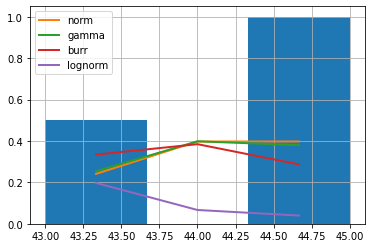

In [26]:
from fitter import Fitter, get_common_distributions, get_distributions
pop_under_46 = under_46['Age'].values
f_46 = Fitter(pop_under_46,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=3)
f_46.fit()
f_46.summary()

In [27]:
f_46.get_best(method = 'sumsquare_error')

{'norm': {'loc': 44.333333333333336, 'scale': 0.9428090415820634}}

## Subpopulation Over 46

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000052,28.828596,-112.524051,0.003005,0.160840,0.923056
norm,0.000453,24.945032,-95.408889,0.046814,0.188072,0.808983
gamma,0.000522,26.904292,-91.700058,0.051757,0.187907,0.809793
burr,0.000947,29.466185,-83.436043,0.073326,0.241048,0.530018
lognorm,0.004138,38.117334,-70.992803,0.528814,0.428701,0.034802


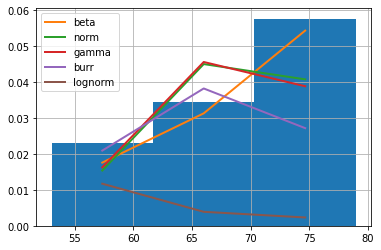

In [28]:
from fitter import Fitter, get_common_distributions, get_distributions
pop_over_46 = over_46['Age'].values
f_over_46 = Fitter(pop_over_46,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=3)
f_over_46.fit()
f_over_46.summary()

In [29]:
f_over_46.get_best(method = 'sumsquare_error')

{'beta': {'a': 1.6975480390570108,
  'b': 0.7435252152919518,
  'loc': 47.63372059079753,
  'scale': 31.366279409202473}}

## Hypothesis tests -- STATISTICAL INFERENCE

About 56% who say their news media are doing well at reporting:  
  https://www.pewresearch.org/fact-tank/2020/01/24/qa-how-pew-research-center-evaluated-americans-trust-in-30-news-sources/

The Weather Channel, The Wall Street Journal and Public Service Broadcasting amoung the most reliable. NY Times in the middle and CNN and FoxNews last (included in repor)t:  
  https://today.yougov.com/topics/politics/articles-reports/2022/04/05/trust-media-2022-where-americans-get-news-poll

## Statistical Inference of one variable  


How many people trust the news?

> Counts for variable **"num_reliable"**



How many people agree with certain news channels?  


> Counts for variable **"agree"** and its values



Obtain and interpret confidence intervals for the population mean of the variables of interest (num_reliable, agree).  Moti-vate a hypothesis test using some information obtained from news about a mean population (include the source of information).  Test your hypothesis using your data set.

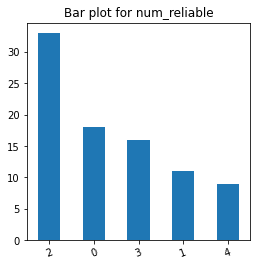

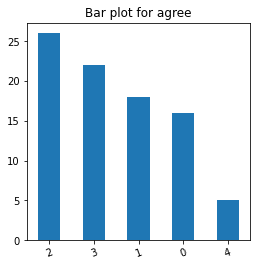

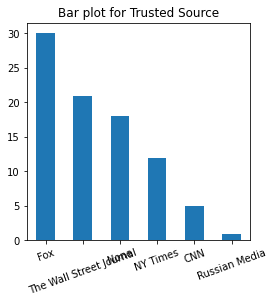

In [30]:
cols = ['num_reliable', 'agree', 'Trusted Source']
for col in cols:
    fig = plt.figure(figsize=(4,4)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = news[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    plt.xticks(rotation=20)
    ax.set_title('Bar plot for ' + col)

## Conclusions from UNIVARIATE hypothesis test:

**Most people trust Fox which is completely the opposite of evidence on the internet, and not many people trust CNN which is right along the lines with what Pew Research says.** **Very few people in the survey agree with 1 or all of the sources listed and most people agree with 2 or 3. They also mostly trust 2 or 3.**

## Statistical Inference of two variables  

1) Does age influence trust? (age, num_reliable)   

2) Does age influence the trusted source? (age, Trusted Source)  

3) Does occupation influence trust (students vs other)? (occupation, num_reliable)  

4) Does income affect the trusted news source? (income, num_reliable)   

5) Does occupation influence agreement with certain news channels? (occupation, Trusted Source)

*Perform interesting hypothesis test based on two variables.  These can be different depending on yourdata.  For example, you may want to test if two categorical variables are related to one another.  Oryou may want to compare if there are statistical differences in the mean of two (or more) populations.In case you have two paired continuous variables, you may want to test if there exist significant linearcorrelation between them.*

Correlation

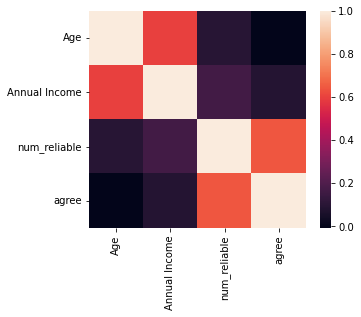

In [31]:
#CORRELATION MATRIX AMONG FEATURES
corrmat = news.corr()
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

It is easy to tell which variables could be related to one another when it comes to this multi-variate analysis. We could pretty much answer the above questions just by looking at this correlation matrix, but let's look closer at each of the two variable being compared in the questions

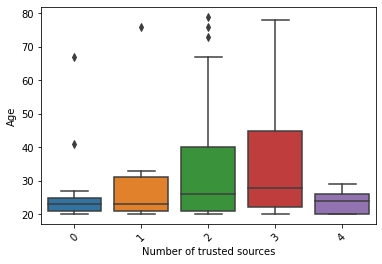

In [34]:
# 1) Does age influence trust?
# boxplot

sns.boxplot(x=news['num_reliable'], y='Age', data=news)
plt.xlabel('Number of trusted sources') # Set text for the x axis
plt.xticks(rotation=45)
plt.ylabel('Age')# Set text for y axis
plt.show()

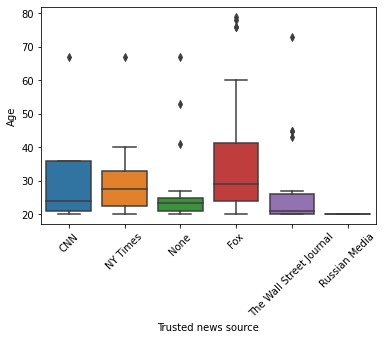

In [35]:
# 2) Does age influence trusted source?
# boxplot

sns.boxplot(x=news['Trusted Source'], y='Age', data=news)
plt.xlabel('Trusted news source') # Set text for the x axis
plt.xticks(rotation=45)
plt.ylabel('Age')# Set text for y axis
plt.show()

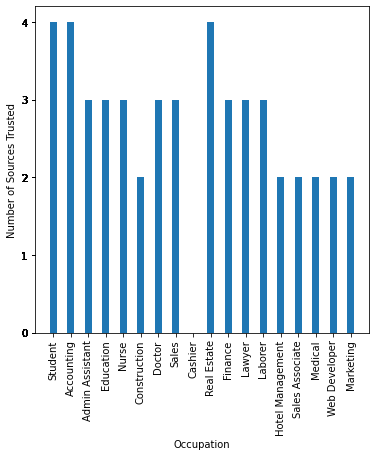

In [55]:
# 3) Does occupation influence trust?
# barplot

fig = plt.figure(figsize = (6, 6))
plt.bar(news['Occupation'], news['num_reliable'],
        width = 0.4)
 
plt.xlabel("Occupation")
plt.xticks(rotation=90)
my_yticks = news['num_reliable'].values
plt.yticks(my_yticks)
plt.ylabel("Number of Sources Trusted")
plt.show()

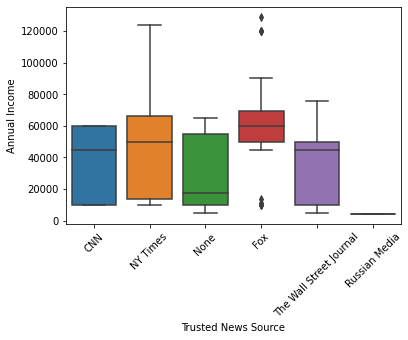

In [36]:
# 4) Does income level influence trusted news source?
# boxplot

sns.boxplot(x=news['Trusted Source'], y='Annual Income', data=news)
plt.xlabel('Trusted News Source') # Set text for the x axis
plt.xticks(rotation=45)
plt.ylabel('Annual Income')# Set text for y axis
plt.show()

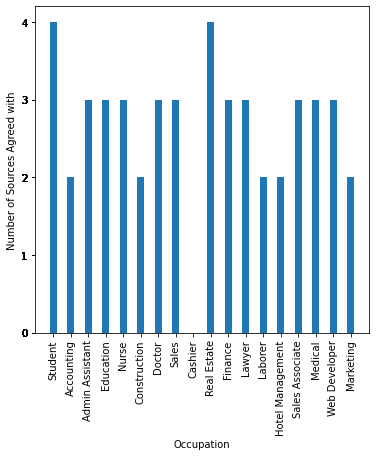

In [54]:
# 5) Does occupation influence agreement?
# barplot

fig = plt.figure(figsize = (6, 6))
plt.bar(news['Occupation'], news['agree'],
        width = 0.4)
 
plt.xlabel("Occupation")
plt.xticks(rotation=90)
my_yticks = news['agree'].values
plt.yticks(my_yticks)
plt.ylabel("Number of Sources Agreed with")
plt.show()

## Conclusions for multivariate hypothesis tests

## Pairplots for Distributions (EXTRA)

We can also examine multi-variable relationships by looking at pairplots.  
Find the relationship between variables where they can be continuous or categorical. Plot pairwise relationships in a data-set.

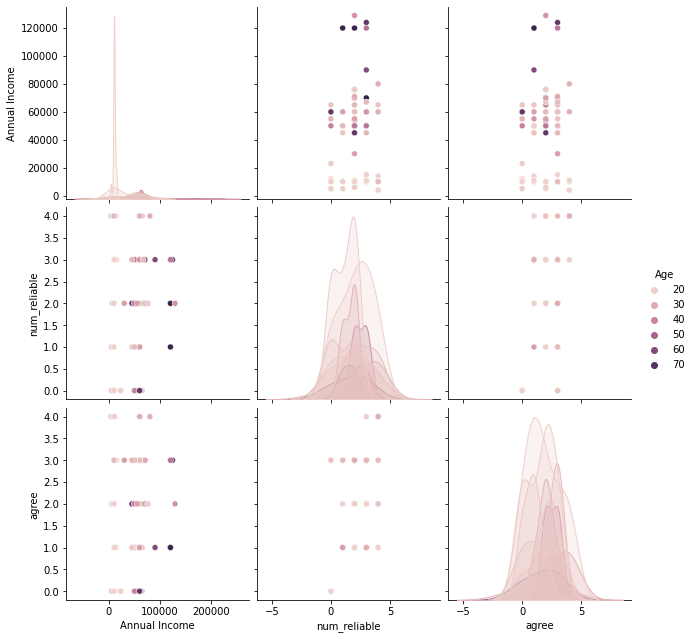

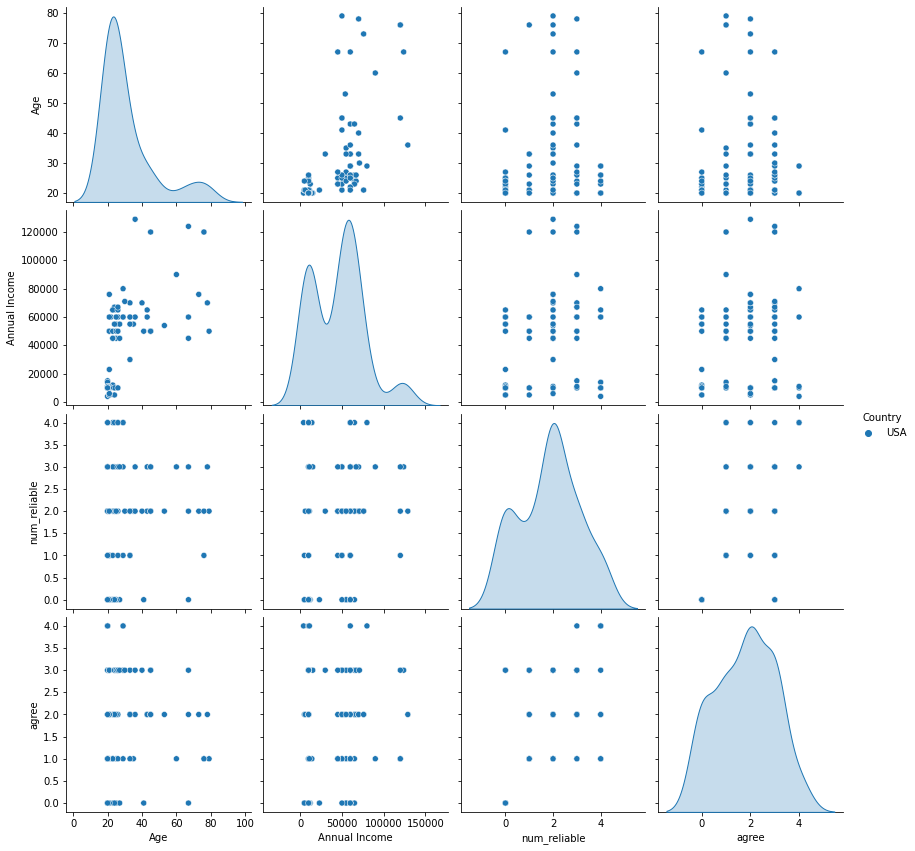

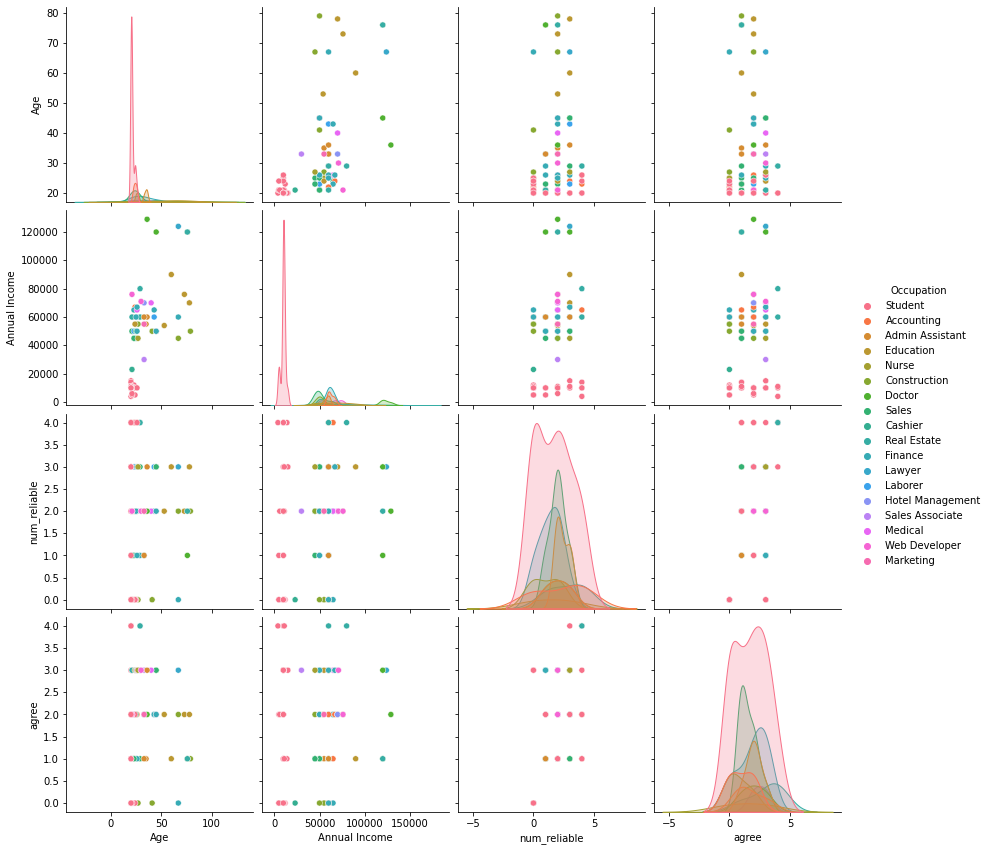

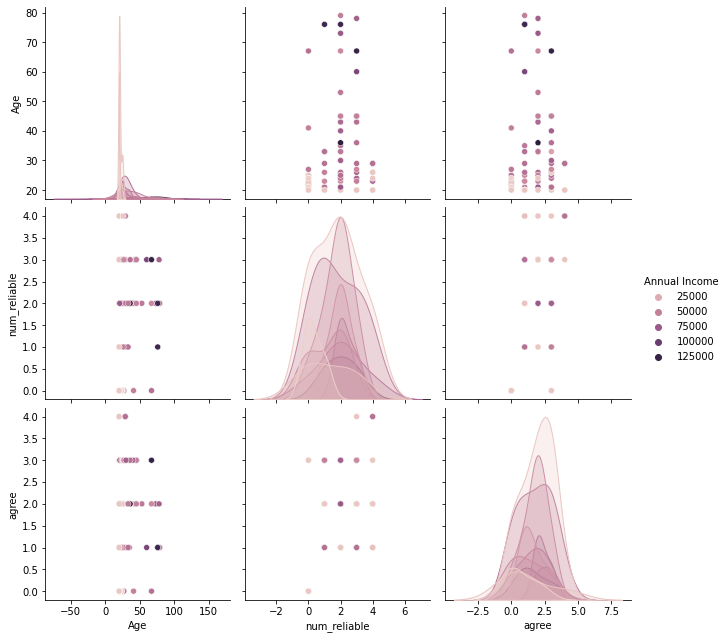

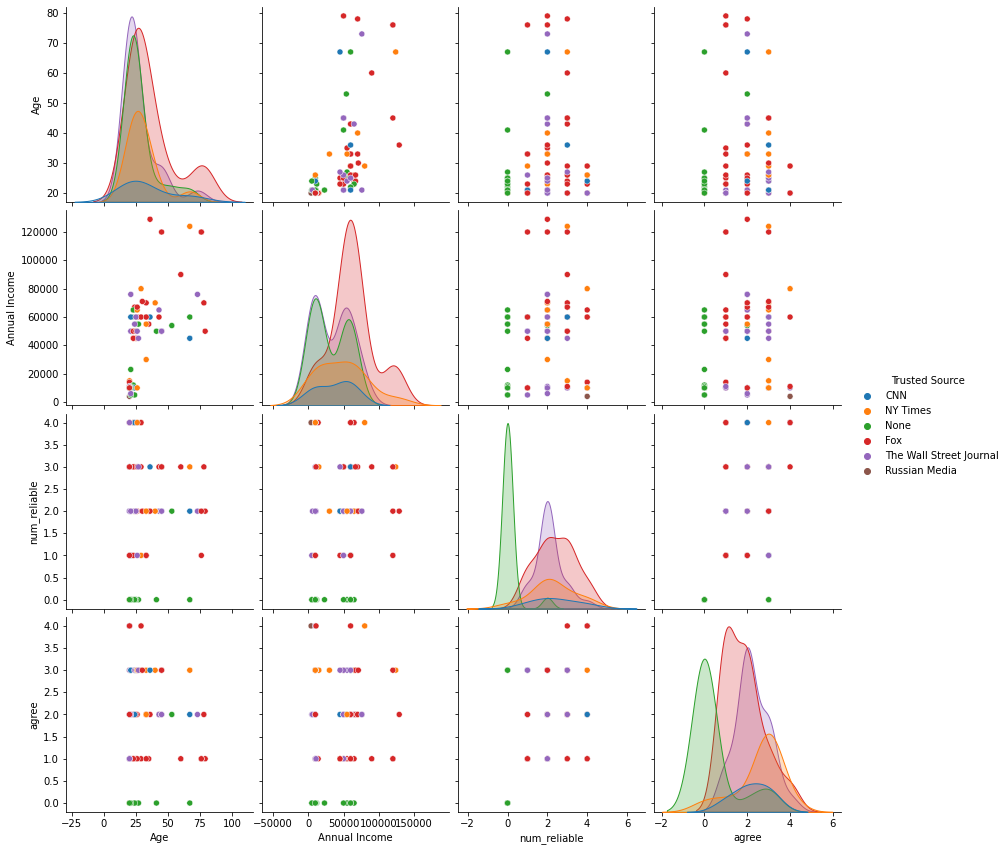

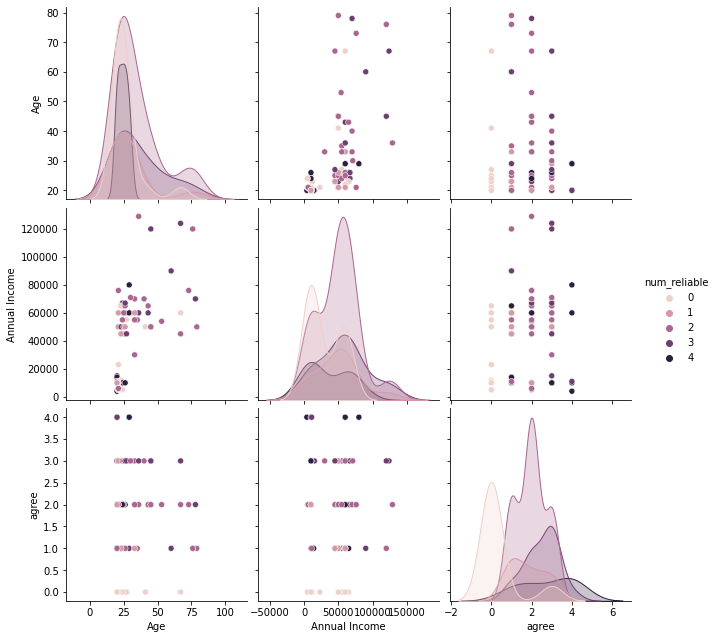

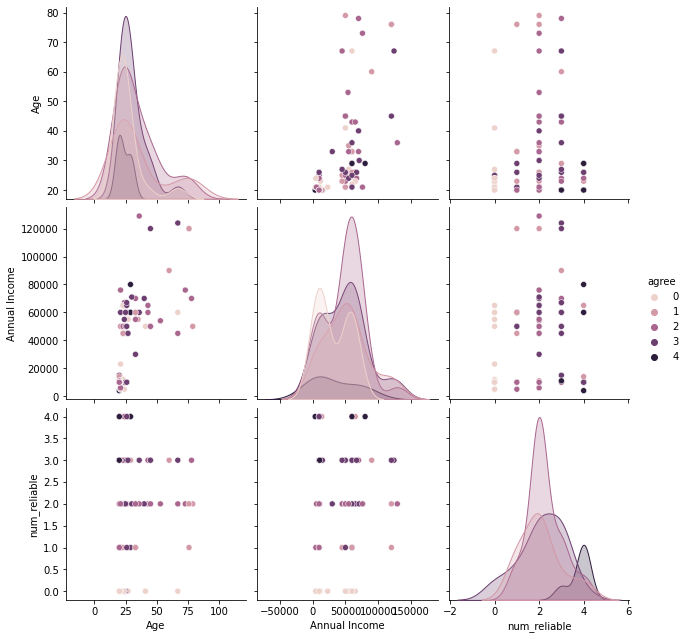

In [12]:
# The main-diagonal subplots are the univariate histograms (distributions) for each attribute.
for col in news.columns:
  sns.pairplot(news, height=3.0, hue=col)